# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2 as cv

%matplotlib inline

### Read in and display the image

In [2]:
# Read in the image
image = cv.imread('images/car_green_screen.jpg')
img_copy = np.copy(image)
img_copy = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', img_copy.shape)


Image dimensions: (450, 660, 3)


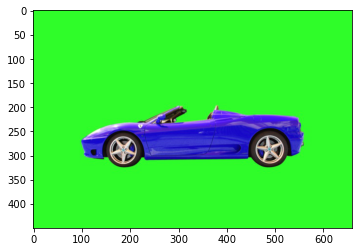

In [3]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [15]:
## TODO: Define our color selection boundaries in RGB values
lower_g = (0, 200, 0)
upper_g = (190, 255, 190)

### Create a mask

(450, 660)


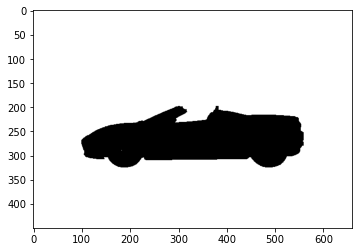

In [16]:
# Define the masked area
mask = cv.inRange(img_copy, lower_g, upper_g)

# Vizualize the mask
plt.imshow(mask, cmap='gray')
print(mask.shape)

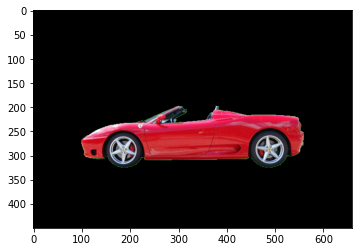

In [17]:
# Mask the image to let the car show through
masked_img = np.copy(img_copy)
masked_img[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_img)


### Mask and add a background image

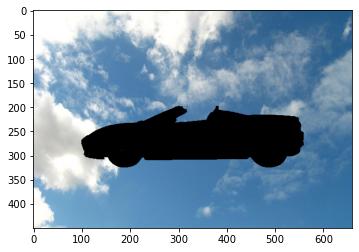

In [20]:
# Load in a background image, and convert it to RGB 
bg_img = cv.imread('images/sky.jpg')
bg_img = np.copy(bg_img)
bg_img = cv.cvtColor(bg_img, cv.COLOR_BGR2RGB)
## TODO: Crop it or resize the background to be the right size (450x660)
bg_img_croped = cv.resize(bg_img,(660, 450))
## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
bg_img_croped[mask == 0] = 0
## TODO: Display the background and make sure 
plt.imshow(bg_img_croped)

### Create a complete image

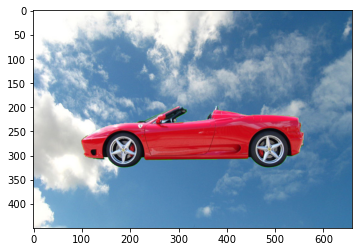

In [21]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background
complete_img = masked_img + bg_img_croped
plt.imshow(complete_img)
